## XOR problem Practice

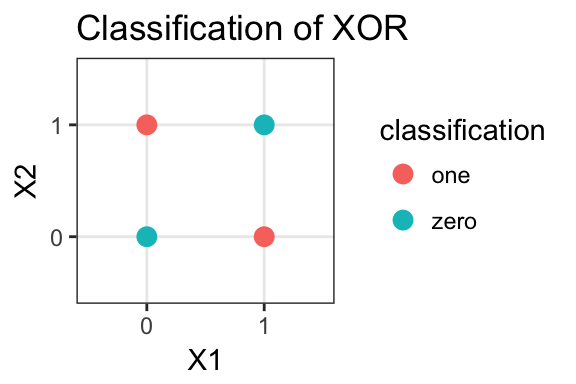

어제 실습을 진행하면서 사용했던 몇가지 도구를 불러오겠습니다. plt와 np 모두 기억하시죠?

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

torch tensor를 활용하여 X와 Y를 만들어보겠습니다. 아래 셀을 실행하면서 할당되는 X와 Y가 무엇을 뜻하는 것인지 아시겠나요?

In [25]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [1], [0]])

어제 실습했던 plt를 활용해볼텐데요

어제 plt.plot은 점과 점을 선으로 이어서 그려주는 함수라고 말씀드렸습니다.

인자로 특정 조건을 주는 경우에는 원하는 위치에 점을 찍어줄 수도 있습니다.

아래 for loop를 보시면 X,Y를 zip으로 묶어서 함께 iteration인자로 넘겨줄 수 있습니다. 종종 활용할 수 있는 편리한 기능입니다.

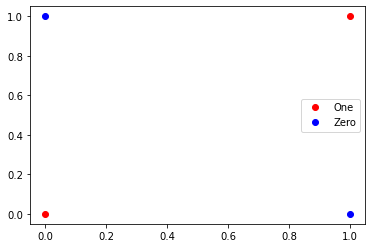

In [10]:
for x, y in zip(X,Y):
    if y == 0 :
        plt.plot(x[0], x[1], 'ro')
                
    else:

        plt.plot(x[0], x[1], 'bo')
        
plt.legend(['One', 'Zero'])
    
plt.show()

인공신경망에서는 input layer와 hidden layer, outputlayer로 전달 됩니다. 

![image.png](https://www.researchgate.net/profile/Adem-Tekerek-2/publication/335903047/figure/fig1/AS:805611931443200@1569084260672/Proposed-artificial-neural-network-model-3-10-1-Neural-network-weight-vectors-are.png)
각 층에 존재하는 한 단위의 인공뉴런을 node라고 부릅니다.

매개변수인 가중치(weight)에 행렬곱을 하고, bias를 더해줍니다. 

가중치는 입력 신호가 출력에 주는 영향을 계산하는 매개변수이고, 편향은 각 노드가 얼마나 데이터에 민감한지를 알려주는 매개변수 입니다.

이 행렬곱의 결과는 활성화 함수(activation fuction)을 거쳐 인공뉴련의 결과값을 산출하게 됩니다. 

활성화 함수는 입력에 적절한 처리를 해서 출력 신호로 변환하는 함수 입니다. 활성화 함수는 입력 신호의 합이 활성화를 일으키는지 아닌지를 정하는 역할을 합니다. 

hiddenlayer를 이 과정을 반복합니다.

우리는 인공신경망의 outputlayer의 결과값과 정답을 비교해 오차를 계산해야 합니다. 

이 오차를 기반으로 신경망 전체를 학습시키려면 출력층의 가중치부터 입력층의 가중치까지 모두 gradient decent method를 활용해 변경해줘야 합니다. 

이 작업을 최적화하는 알고리즘이 그 유명한 역전파 backpropagation 알고리즘입니다.

커다란 인공신경망을 만들기 전에 우선, 가장 간단한 하나의 퍼셉트론만을 구현하고 이를 이용하여 문제를 해결해보겠습니다.

![image](https://miro.medium.com/max/1400/1*BMSfafFNEpqGFCNU4smPkg.png)

퍼셉트론이 처음 소개되었을 때 활성화 함수는 계단 함수였지만, 우리는 이미 또 다른 활성화 함수인 시그모이드 함수를 알고 있으므로 시그모이드 함수를 사용해보겠습니다.

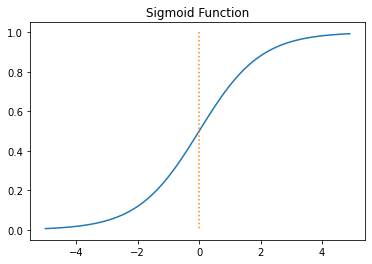

In [40]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
# plt.axhline(y=0.5, color='r', linewidth=1)
plt.title('Sigmoid Function')
plt.show()

사실 Sigmoid 외에도 수많은 활성화 함수들이 존재합니다.

![image](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60be4975a399c635d06ea853_hero_image_activation_func_dark.png)

pytorch는 퍼셉트론과 레이어를 손쉽게 쌓을 수 있게 해줍니다.

In [39]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x

__init__함수는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출됩니다.

super()함수를 부르면 우리가 만든 NeuralNet 클래스를 torch.nn.Module클래스의 속성들을 가지고 초기화가 됩니다. 

0 또는 1을 예측하는 이진 분류 문제이므로 비용 함수로는 크로스엔트로피 함수를 사용합니다.
nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수입니다.
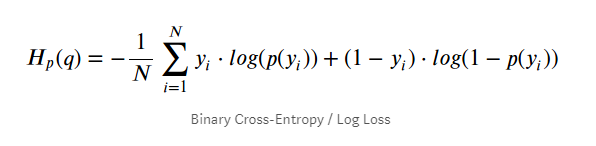

또 학습을 해야죠, 저희가 배운 gradient descent 를 사용할 겁니다.
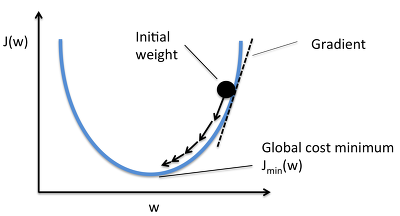

이 경사하강법을 최적화 하는 방법 중에 확률적 경사하강법인 stochastic GD를 쓸 예정입니다.

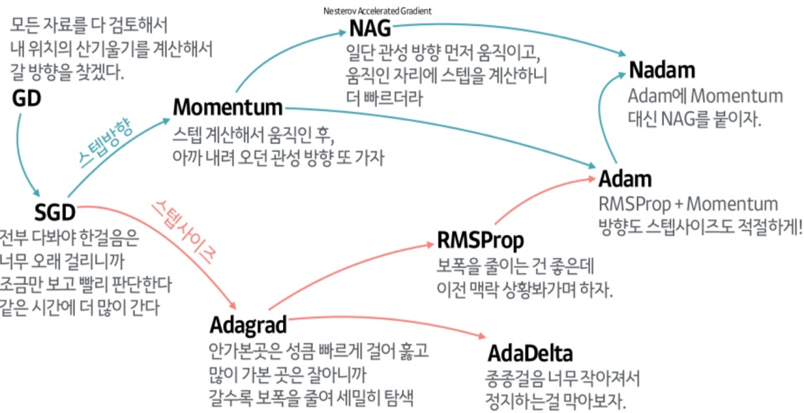

실제로 많은 Optimizer가 존재하고, 계속해서 업데이트 되고 있습니다. 상황에 맞춰서 적용하는 것이 필요합니다.

In [33]:
model = Net()
criterion = torch.nn.BCELoss().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=1.0)

zero_grad()를 호출해 경사값을 0으로 설정합니다.

우리의 가설은 모델이 X를 처리한 결과값과 Y라는 정답 사이의 거리를 cost로 설정하는 것입니다.

cost를 역전파시킵니다.

optimizer는 step()함수를 부를 때마다 가중치를 학습률 만큼 갱신합니다. lr = 1.0

In [34]:
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7215942144393921
100 0.6931480765342712
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [36]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.numpy())
    print('모델의 예측값(Predicted): ', predicted.numpy())
    print('실제값(Y): ', Y.numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


제대로 예측이 안되는 것을 볼 수 있습니다.

XOR문제는 하나의 퍼셉트론(하나의 레이어)로는 풀 수 없는 문제입니다.

하나의 퍼셉트론(하나의 레이어)로는 단순 선형문제만을 풀 수 있을 뿐입니다.

![image2](https://miro.medium.com/max/1400/1*Tc8UgR_fjI_h0p3y4H9MwA.png)

두개 이상의 layer가 존재할 때, XOR문제는 해결될 수 있습니다.

# Practice
### 위 코드에서 hidden layer를 추가하여 XOR문제를 해결해 봅시다.